Jeremy Ardhito Sulle – 2440031250


Mike D.S. – 2440012182



Vincentius Jonathan - 2440006822

Joshua Immanuel Tjandra – 2440032953

# Data Preparation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/mike-ds30/ML-Project/main/housing.csv')

In [ ]:
df.head()

,Location,Bedrooms,Bathrooms,Land (SquareMeters),HouseType,Price
0,Pusat,3,2.0,261,Apartment,9.500000e+09
1,Selatan,5,3.0,200,House,1.080000e+10
2,Pusat,2,1.0,61,Apartment,2.100000e+09
3,Timur,5,4.0,175,House,2.250000e+09
4,Timur,5,5.0,400,House,4.000000e+09


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1906 entries, 0 to 1905
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Location             1906 non-null   object 
 1   Bedrooms             1906 non-null   int64  
 2   Bathrooms            1906 non-null   float64
 3   Land (SquareMeters)  1906 non-null   int64  
 4   HouseType            1906 non-null   object 
 5   Price                1906 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 89.5+ KB


In [ ]:
df.isnull().sum()

Location               0
Bedrooms               0
Bathrooms              0
Land (SquareMeters)    0
HouseType              0
Price                  0
dtype: int64

In [ ]:
Location = pd.get_dummies(df['Location'],drop_first=True)
HouseType = pd.get_dummies(df['HouseType'],drop_first=True)

df.drop(['Location','HouseType'],axis=1,inplace=True)

df = pd.concat([df,Location, HouseType],axis=1)

In [ ]:
df.head()

,Bedrooms,Bathrooms,Land (SquareMeters),Price,Pusat,Selatan,Timur,Utara,Condo,House
0,3,2.0,261,9.500000e+09,1,0,0,0,0,0
1,5,3.0,200,1.080000e+10,0,1,0,0,0,1
2,2,1.0,61,2.100000e+09,1,0,0,0,0,0
3,5,4.0,175,2.250000e+09,0,0,1,0,0,1
4,5,5.0,400,4.000000e+09,0,0,1,0,0,1


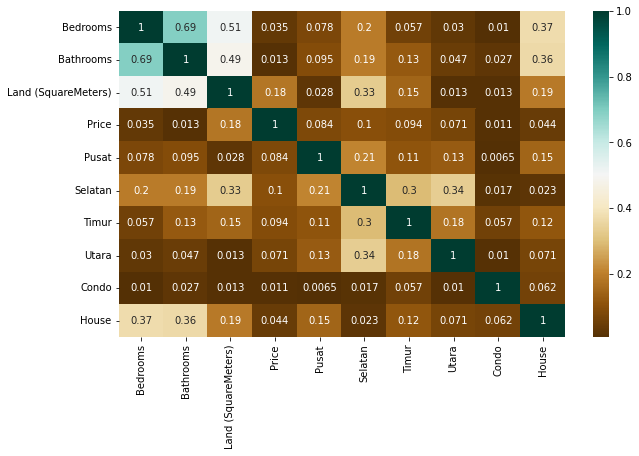

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(np.absolute(df.corr()),annot=True, cmap='BrBG')

In [ ]:
df = df.drop('Bathrooms',axis=1)

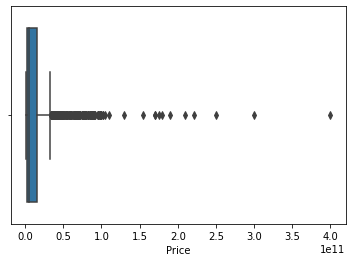

In [ ]:
sns.boxplot(x='Price', data=df)

In [ ]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
iqr = Q3 - Q1

upper = np.where(df['Price'] >= Q3 + 1.5 * iqr)
lower = np.where(df['Price'] <= Q1 - 1.5 * iqr)

df.drop(upper[0], inplace=True)
df.drop(lower[0], inplace=True)

df.drop(df.loc[df['Land (SquareMeters)'] == 0].index, inplace=True)

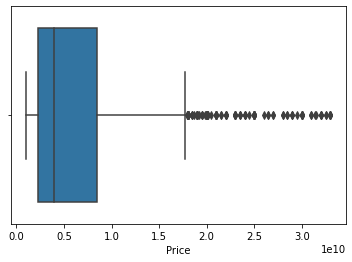

In [ ]:
sns.boxplot(x='Price', data=df)

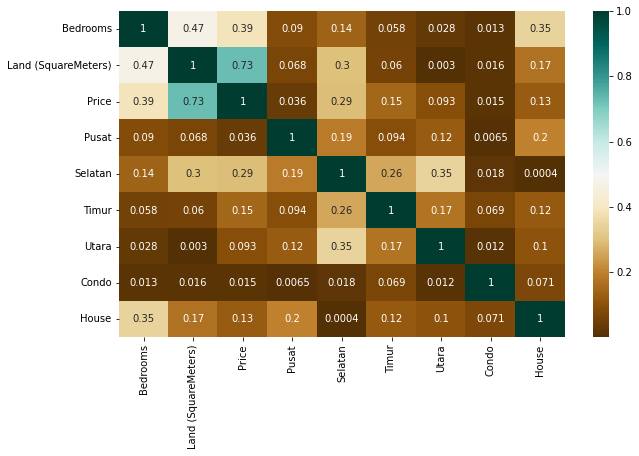

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(np.absolute(df.corr()),annot=True, cmap='BrBG')

# Modelling with KNN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
sc = StandardScaler()

In [ ]:
#X = pd.DataFrame(sc.fit_transform(df.drop(['Price','Pusat','Selatan','Timur','Utara', 'Condo','House'],axis=1))).values
#X = df.drop(['Price','Pusat','Selatan','Timur','Utara', 'Condo','House'],axis=1).values

X =pd.DataFrame(sc.fit_transform( df.drop(['Price'],axis=1))).values
y = df['Price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state = 2)

In [ ]:
def euclidean(x1, x2):
  return np.sqrt(np.sum((x1 - x2) ** 2))

In [ ]:
class KNNRegressionEuclidian:
  def __init__(self, k):
    self.k = k
  
  def fit(self, X_train, y_train):
    self.X_train = X_train
    self.y_train = y_train

  def predict(self, X_test):
    y_pred = [self._predict(x_test) for x_test in X_test]
    return np.array(y_pred)

  def _predict(self, x_test):
    dist = [euclidean(x_test, x_train) for x_train in self.X_train]
    k_nearest = np.argsort(dist)[:self.k]
    k_nearest_values = [self.y_train[i] for i in k_nearest]
    average = np.average(k_nearest_values)
    return average

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

No handles with labels found to put in legend.


<function matplotlib.pyplot.show>

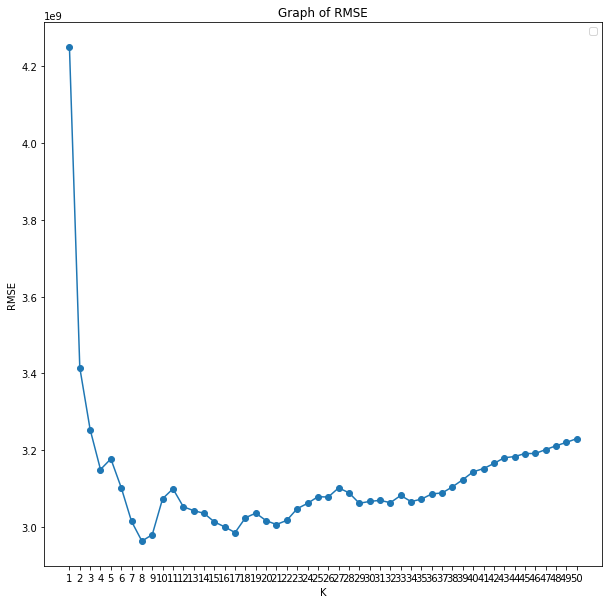

In [ ]:
rmse_values = []
k_num = []
for k in range(1, 51):
  model = KNNRegressionEuclidian(k)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  k_num.append(k)
  rmse_values.append(np.sqrt(mean_squared_error(y_test, y_pred)))
plt.figure(figsize=(10, 10))
plt.plot(k_num, rmse_values, "o-")
plt.title("Graph of RMSE")
plt.xticks(np.arange(1, 51, 1.0))
plt.xlabel("K")
plt.ylabel("RMSE")
plt.legend()
plt.show

In [ ]:
KNN = KNNRegressionEuclidian(8)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
res = pd.DataFrame({'Predicted': y_pred, 'Ground Truth': y_test})
res.head(10)

,Predicted,Ground Truth
0,6.450000e+09,2.500000e+09
1,5.312500e+09,4.690000e+09
2,9.687500e+09,1.000000e+10
3,1.193125e+10,1.850000e+10
4,2.662500e+09,2.700000e+09
5,2.856250e+09,1.900000e+09
6,4.837500e+09,5.450000e+09
7,3.950000e+09,4.200000e+09
8,1.350000e+09,1.450000e+09
9,2.956250e+09,4.300000e+09


In [ ]:
print('MAE = ', mean_absolute_error(y_test, y_pred))
print('MSE = ', mean_squared_error(y_test, y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 SCORE = ', r2_score(y_test, y_pred))

MAE =  1639825819.672131
MSE =  8.784029841188524e+18
RMSE =  2963786402.7605844
R2 SCORE =  0.740353230611412


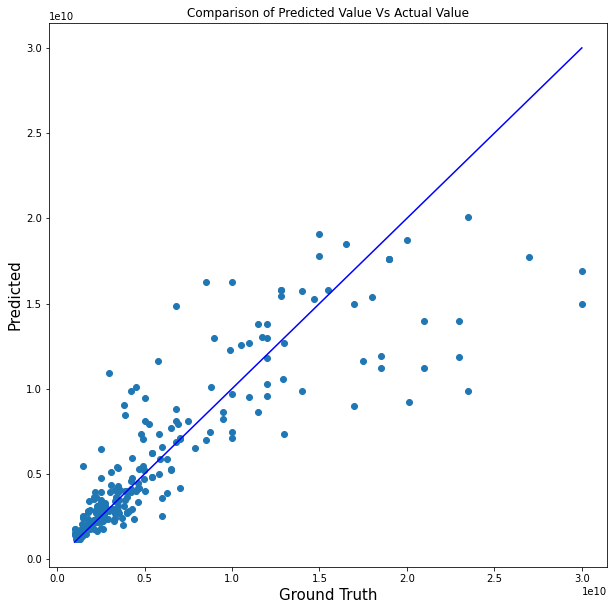

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_pred)
p1 = max(max(y_test), max(y_pred))
p2 = min(min(y_test), min(y_pred))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title("Comparison of Predicted Value Vs Actual Value")
plt.xlabel('Ground Truth', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.show()

# Linear Regression


In [ ]:
import numpy as np
 
def MSE_count(y, y_predicted):
    length = len(y)
    sum_value = 0
    for i in range(length):
        sum_value += (y[i] - y_predicted[i])**2
    return sum_value/length

class LinearRegression:
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None


    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        n_iters = self.n_iters
        loss = []

        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            dw =  ( 2 * np.dot(X.T, (y_predicted - y))) / n_samples
            db = ( 2 * np.sum(y_predicted - y)) / n_samples
            loss.append(MSE_count(y, y_predicted))
            
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
        
        plt.plot(np.arange(1, n_iters), loss[1:])
        plt.xlabel("Iteration")
        plt.ylabel("Loss")
        
        return self.weights, self.bias
    
    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted

MAE = 1991003903.485234
MSE = 9.997068435655272e+18
RMSE = 3161814105.1705227
R2 SCORE = 0.7044970737117504


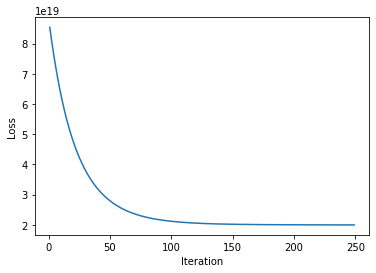

In [ ]:
LR = LinearRegression(lr=0.01, n_iters=250)
weights,bias = LR.fit(X_train,y_train)

weights = {'Features':[['Bedrooms'],['Land'],['Pusat'],['Selatan'],['Timur'],['Utara'],['Condo'],['House']], 'Weights':weights}  
weight_list = pd.DataFrame(weights)

predictions = LR.predict(X_test)

from sklearn import metrics
print('MAE =',metrics.mean_absolute_error(y_test,predictions))
print('MSE =',metrics.mean_squared_error(y_test,predictions))
print('RMSE =',np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('R2 SCORE =',metrics.r2_score(y_test,predictions))

In [ ]:
 weight_list

,Features,Weights
0,[Bedrooms],6.231043e+08
1,[Land],4.053130e+09
2,[Pusat],3.253127e+08
3,[Selatan],8.767919e+08
4,[Timur],-4.019764e+08
5,[Utara],9.023110e+08
6,[Condo],2.410422e+07
7,[House],-1.316215e+08


In [ ]:
print('Bias =',bias)

Bias = 6637531310.037721


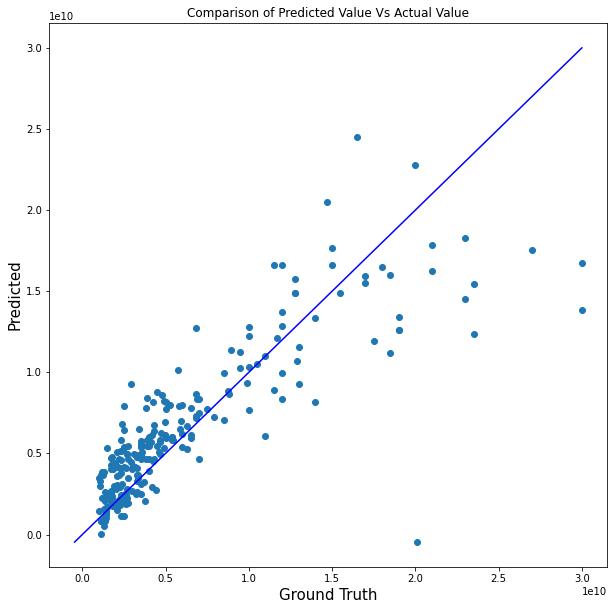

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(y_test, predictions)
p1 = max(max(y_test), max(predictions))
p2 = min(min(y_test), min(predictions))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title("Comparison of Predicted Value Vs Actual Value")
plt.xlabel('Ground Truth', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.show()